In [4]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:

file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images'):
        for img in os.listdir(path):
            print(label_names[i])
            pic = cv2.imread(os.path.join(path,img))
            pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
            pic = cv2.resize(pic,(80,80))
            data.append(pic)
            year = label_names[i].split(" ")[0]
            labels.append(year)
        i+=1
        

1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1820 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1830 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1840 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1850 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1860 fashion
1870 fashion
1870 fashion

1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1976 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1977 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1978 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1979 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1980 fashion
1981 fashion
1981 fashion
1981 fashion
1981 fashion
1981 fashion
1981 fashion

2018 fashion
2018 fashion
2018 fashion
2018 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2019 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion
2020 fashion


In [189]:
data = np.asarray(data)
print(data[344])
print(labels[344])

[[[255 253  94]
  [255 255 109]
  [253 250 109]
  ...
  [255 255 121]
  [255 254 127]
  [255 254 127]]

 [[253 246  93]
  [251 249  93]
  [255 255  96]
  ...
  [255 255 122]
  [255 254 128]
  [254 255 135]]

 [[255 249  93]
  [255 255 109]
  [255 247 136]
  ...
  [255 255 130]
  [255 255 133]
  [253 255 140]]

 ...

 [[207 182 186]
  [196 165 190]
  [207 182 206]
  ...
  [253 233 243]
  [241 223 227]
  [249 221 235]]

 [[202 172 183]
  [218 191 209]
  [208 180 196]
  ...
  [246 226 240]
  [235 215 234]
  [231 207 222]]

 [[194 155 184]
  [203 180 188]
  [191 169 185]
  ...
  [255 239 252]
  [245 218 237]
  [239 212 234]]]
1957


In [128]:
print(data[0].shape)
#plt.imshow(saved[0].reshape(80,80,3))
#plt.imshow(np.array(training_data[0]).reshape(160, 160, 6))

(80, 80, 3)


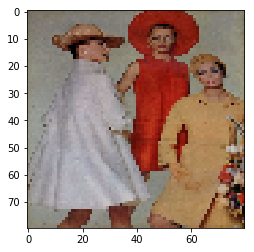

In [190]:
plt.imshow(data[344].reshape(80, 80, 3))